In [38]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [46]:
img1 = cv2.imread("backpack_left.png")
img2 = cv2.imread("backpack_right.png")
l_image = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
r_image = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

my_SIFT_instance = cv2.SIFT_create()
l_keypoints, l_descriptors = my_SIFT_instance.detectAndCompute(l_image, None) # returns list of keypoints and an array of 128xkp
r_keypoints, r_descriptors = my_SIFT_instance.detectAndCompute(r_image, None) # setting mask field to None

l_image = cv2.drawKeypoints(l_image, l_keypoints, l_image)
r_image = cv2.drawKeypoints(r_image, l_keypoints, r_image)

bf_matcher = cv2.BFMatcher()  # returns the best match
matches = bf_matcher.knnMatch(l_descriptors, r_descriptors, k=2)  # returns the k best matches

    
# Using Lowe's Ratio Test to evaluate if the euclidean distance of one match is less than distance to next best match using threshold of 0.8
good_match = []
lowes_match_distance = []
for m, n in matches:
    if m.distance < 0.8*n.distance: # using each matches euclidean distance
        lowes_match_distance.append(m.distance)
        good_match.append([m]) # only considering the best matches

        
non_lowes_match_distance = []
for m, n in matches:
    non_lowes_match_distance.append(m.distance)
    non_lowes_match_distance.append(n.distance)
    
        
matched_backpack = cv2.drawMatchesKnn(l_image, l_keypoints, r_image, r_keypoints, matches, flags=2, outImg = None)
lowes_matched_backpack = cv2.drawMatchesKnn(l_image, l_keypoints, r_image, r_keypoints, good_match, flags=2, outImg = None)

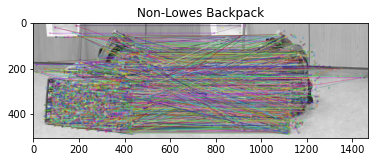

In [71]:
plt.title("Non-Lowes Backpack")
plt.imshow(matched_backpack)

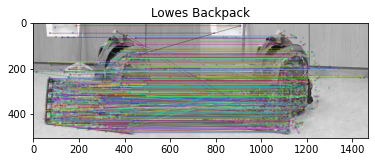

In [70]:
plt.title("Lowes Backpack")
plt.imshow(lowes_matched_backpack)

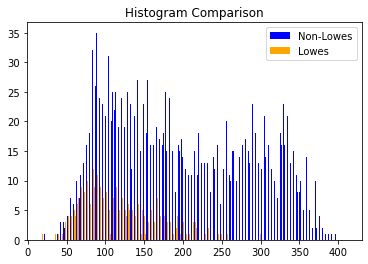

In [48]:
# create histogram to distinguish the difference between before and after Lowe's Ratio Test
plt.title("Histogram Comparison")
colors = ['Blue', 'Orange']
plt.hist([non_lowes_match_distance, lowes_match_distance], bins=400, color=colors, label= ["Non-Lowes", "Lowes"])

plt.legend()

In [63]:
def image_flip(img):
    img_width, img_height, img_channel = img.shape # initializing array dimensions for looping purposes
    hor_flipped_img = np.zeros((img_height,img_width,3), np.uint8) # initializing empty images with same width, height, channel and dtype
    for i in range(img_height):
        for j in range(img_width):
            for k in range(img_channel):
                hor_flipped_img[i][j][k] = img[i][img_width-j-1][k] # horizontally flipped image has a reveresed order of columns in its array values
    return hor_flipped_img

img1 = cv2.imread("lena.png")
img2 = image_flip(img1)

l_image = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
r_image = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

my_SIFT_instance = cv2.SIFT_create()
l_keypoints, l_descriptors = my_SIFT_instance.detectAndCompute(l_image, None) # returns list of keypoints and an array of 128xkp
r_keypoints, r_descriptors = my_SIFT_instance.detectAndCompute(r_image, None) # setting mask field to None

l_image = cv2.drawKeypoints(l_image, l_keypoints, l_image)
r_image = cv2.drawKeypoints(r_image, l_keypoints, r_image)

bf_matcher = cv2.BFMatcher()  # returns the best match
matches = bf_matcher.knnMatch(l_descriptors, r_descriptors, k=2)  # returns the k best matches

    
# Using Lowe's Ratio Test to evaluate if the euclidean distance of one match is less than distance to next best match using threshold of 0.8
good_match = []
lowes_match_distance = []
for m, n in matches:
    if m.distance < 0.8*n.distance: # using each matches euclidean distance
        lowes_match_distance.append(m.distance)
        good_match.append([m]) # only considering the best matches


non_lowes_match_distance = []
for m, n in matches:
    non_lowes_match_distance.append(m.distance)
    non_lowes_match_distance.append(n.distance)
    
        
matched_lena = cv2.drawMatchesKnn(l_image, l_keypoints, r_image, r_keypoints, matches, flags=2, outImg = None)
lowes_matched_lena = cv2.drawMatchesKnn(l_image, l_keypoints, r_image, r_keypoints, good_match, flags=2, outImg = None)


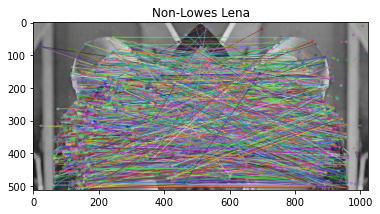

In [69]:
plt.title("Non-Lowes Lena")
plt.imshow(matched_lena)

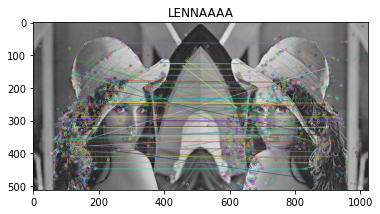

In [68]:
plt.title("Lowes Lena")
plt.imshow(lowes_matched_lena)

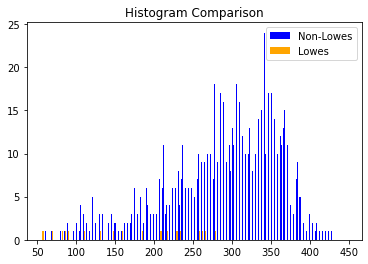

In [67]:
# create histogram to distinguish the difference between before and after Lowe's Ratio Test
plt.title("Histogram Comparison")
colors = ['Blue', 'Orange']
plt.hist([non_lowes_match_distance, lowes_match_distance], bins=400, color=colors, label= ["Non-Lowes", "Lowes"])
plt.legend()

Q1 ANSWER:

From this histogram that compaires the original KNN matches and the Lowes Filtered matches. It does this comparing distances and the number of matches in each array with those distances. It is clear that the Lowes matches eliminates wrongly matched keypoints do to the large amount of blue values shown at 250-400 distance and it also reduces. The test also eliminates multiple matches and only keep the smallest one - this is shown by the way less values the y-axis has for Lowes ratio test. The test does this by only making sure each keypoint has the smallest match.